<a href="https://colab.research.google.com/github/yogi2034/Deep-Learning/blob/main/CNN_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 689s 4us/step


(50000, 32, 32, 3)

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
def sample_plot(X,y)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train=y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X,y,index):
    plt.figure(figsize=(2,3))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])



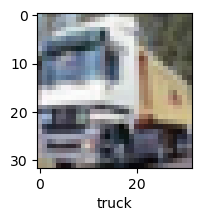

In [ ]:
plot_sample(X_train,y_train,1)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 116s 73ms/step - loss: 1.8091 - accuracy: 0.3546
Epoch 2/5
1563/1563 [==============================] - 112s 71ms/step - loss: 1.6232 - accuracy: 0.4252
Epoch 3/5
1563/1563 [==============================] - 114s 73ms/step - loss: 1.5420 - accuracy: 0.4574
Epoch 4/5
1563/1563 [==============================] - 188s 120ms/step - loss: 1.4829 - accuracy: 0.4780
Epoch 5/5
1563/1563 [==============================] - 186s 119ms/step - loss: 1.4332 - accuracy: 0.4964


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 8s 23ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.49      0.66      0.56      1000
           1       0.69      0.51      0.59      1000
           2       0.37      0.44      0.40      1000
           3       0.38      0.20      0.26      1000
           4       0.52      0.29      0.37      1000
           5       0.33      0.50      0.40      1000
           6       0.54      0.50      0.52      1000
           7       0.46      0.66      0.54      1000
           8       0.71      0.51      0.59      1000
           9       0.56      0.58      0.57      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.48     10000
weighted avg       0.50      0.48      0.48     10000



In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 63s 39ms/step - loss: 1.4815 - accuracy: 0.4681
Epoch 2/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.1112 - accuracy: 0.6118
Epoch 3/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.9771 - accuracy: 0.6606
Epoch 4/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.8901 - accuracy: 0.6909
Epoch 5/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.8271 - accuracy: 0.7139
Epoch 6/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.7692 - accuracy: 0.7326
Epoch 7/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.7176 - accuracy: 0.7487
Epoch 8/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.6716 - accuracy: 0.7664
Epoch 9/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.6303 - accuracy: 0.7790
Epoch 10/10
1563/1563 [==============================] - 46s 29m

In [ ]:
cnn.fit(X_train, y_train, epochs=1)

1563/1563 [==============================] - 33s 21ms/step - loss: 0.3207 - accuracy: 0.8859


In [ ]:
cnn.fit(X_train, y_train, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 60s 39ms/step - loss: 0.5254 - accuracy: 0.8148
Epoch 2/3
1563/1563 [==============================] - 64s 41ms/step - loss: 0.4957 - accuracy: 0.8230
Epoch 3/3
1563/1563 [==============================] - 60s 39ms/step - loss: 0.4704 - accuracy: 0.8339


In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.3107 - accuracy: 0.6841


[1.310729742050171, 0.6840999722480774]

In [ ]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 61s 39ms/step - loss: 0.4367 - accuracy: 0.8445
Epoch 2/5
1563/1563 [==============================] - 38s 24ms/step - loss: 0.4161 - accuracy: 0.8514
Epoch 3/5
1563/1563 [==============================] - 33s 21ms/step - loss: 0.3879 - accuracy: 0.8628
Epoch 4/5
1563/1563 [==============================] - 32s 20ms/step - loss: 0.3643 - accuracy: 0.8716
Epoch 5/5
1563/1563 [==============================] - 32s 20ms/step - loss: 0.3383 - accuracy: 0.8801


In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.2333 - accuracy: 0.6938


[1.233261227607727, 0.6937999725341797]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 8ms/step


array([[4.3768878e-04, 1.5825414e-07, 2.1484592e-04, 9.6295488e-01,
        1.9471968e-06, 2.8982483e-02, 2.9767616e-04, 1.5615101e-06,
        7.1077682e-03, 9.4476820e-07],
       [2.4299245e-06, 8.4434845e-04, 1.4268999e-09, 1.7544171e-13,
        1.5023129e-14, 1.9631721e-13, 5.7474156e-12, 7.8146606e-19,
        9.9901628e-01, 1.3690778e-04],
       [7.0845686e-02, 9.6138188e-04, 3.2348111e-05, 3.8858959e-03,
        1.2865870e-01, 2.3635924e-04, 2.8748840e-07, 8.8407241e-02,
        6.0760689e-01, 9.9365227e-02],
       [9.4442707e-01, 7.8659927e-05, 4.4320561e-03, 7.2510826e-05,
        3.7584625e-05, 1.0019905e-05, 4.0932005e-06, 6.6364625e-09,
        5.0797205e-02, 1.4076618e-04],
       [5.2772929e-08, 1.5642777e-06, 4.7121081e-05, 3.6872715e-01,
        2.3740266e-01, 1.6438570e-04, 3.9365360e-01, 2.9946566e-08,
        3.3792553e-06, 1.3807777e-07]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]

In [ ]:
classes[y_classes[49]]

'frog'

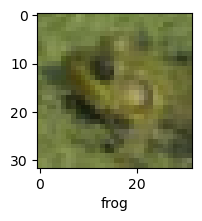

In [ ]:
plot_sample(X_test, y_test,49)